Exploração e limpeza de dados de Fake News

In [71]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Carregar dataset

In [72]:
# Carregar os datasets True e False
df_real = pd.read_csv("../data/News_dataset/real_news.csv")
df_fake = pd.read_csv("../data/News_dataset/fake_news.csv")

# Incluir label
df_real['label'] = 'real'
df_fake['label'] = 'fake'

# Concatenar os datasets
df = pd.concat([df_real[['title','label']], df_fake[['title','label']]], ignore_index=True)
#df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) # remover espaços em branco
display(df.head(10))

,title,label
0,"As U.S. budget fight looms, Republicans flip t...",real
1,U.S. military to accept transgender recruits o...,real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,real
3,FBI Russia probe helped by Australian diplomat...,real
4,Trump wants Postal Service to charge 'much mor...,real
5,"White House, Congress prepare for talks on spe...",real
6,"Trump says Russia probe will be fair, but time...",real
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,real
8,Trump on Twitter (Dec 28) - Global Warming,real
9,Alabama official to certify Senator-elect Jone...,real


Analise exploratoria

In [73]:
print(df.info())
print(df.isnull().sum())

if "label" not in df.columns or "title" not in df.columns:
    raise ValueError("Colunas 'label' e 'title' devem ser preenchidas no dataset.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   label   44898 non-null  object
dtypes: object(2)
memory usage: 701.7+ KB
None
title    0
label    0
dtype: int64


label
fake    23481
real    21417
Name: count, dtype: int64
       title_length
label              
fake      94.198032
real      64.667881


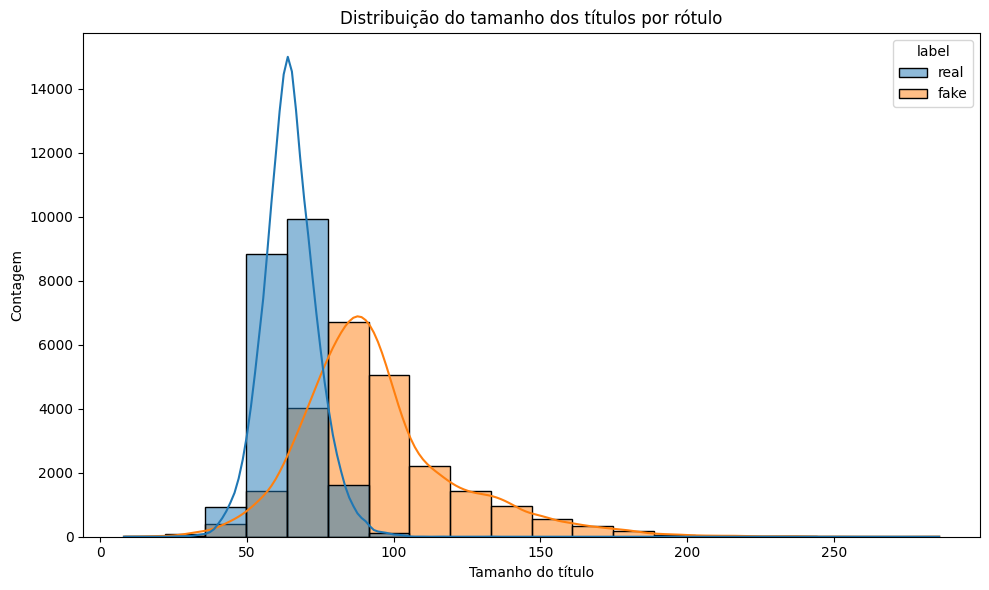

In [74]:
print(df["label"] .value_counts())
df["title_length"] = df["title"] .astype(str).apply(len)
print(df[["label", "title_length"]] .groupby("label") .mean())

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="title_length", hue="label", bins=20, kde=True)
plt.title("Distribuição do tamanho dos títulos por rótulo")
plt.xlabel("Tamanho do título")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

salvar dataset limpo

In [75]:

df.to_csv("../data/news_limpo.csv", index=False)
print("Arquivo salvo em ../data/news_limpo.csv")

Arquivo salvo em ../data/news_limpo.csv
